In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pprint
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# followed directions from sklearn about how to get the Boston Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 1]  # Corrected index to 1 for the second column

# Creating X (features) and Y (target)
X = data[:, :-1]
y = target

# Display the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)


Shape of X: (506, 12)
Shape of Y: (506,)


In [2]:
# if you want to check which column is best, change column var
column = 5

# Selecting "RM" column as X because it tested best
X = data[:, column].reshape(-1, 1)  # Reshape to a column vector for compatibility with sklearn
print("Shape of X:", X.shape)

# split X and Y into train and test
X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

Shape of X: (506, 1)


Coefficients: 
 [-6.17533899]
Mean squared error: 13.71
Coefficient of determination: 0.58


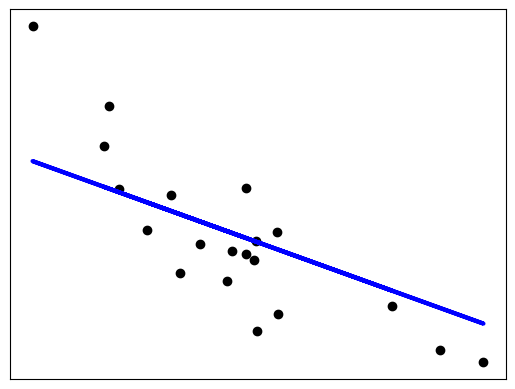

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()